<a href="https://colab.research.google.com/github/DM2003/OIBSIP/blob/main/OIBSIP_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUTHOR: Debangan Mukherjee

In [1]:
# TASK 5
# Oasis InfoByte Data Science Internship
# Sales Prediction with Python
# Dataset: https://www.kaggle.com/datasets/bumba5341/advertisingcsv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
sales_data = pd.read_csv('/content/Sales_OIBSIP.zip')

In [4]:
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
sales_data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
sales_data.shape

(200, 5)

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
sales_data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Thus, we can see there are no missing values

In [9]:
sales_data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


VISUALIZATIONS

<Figure size 600x600 with 0 Axes>

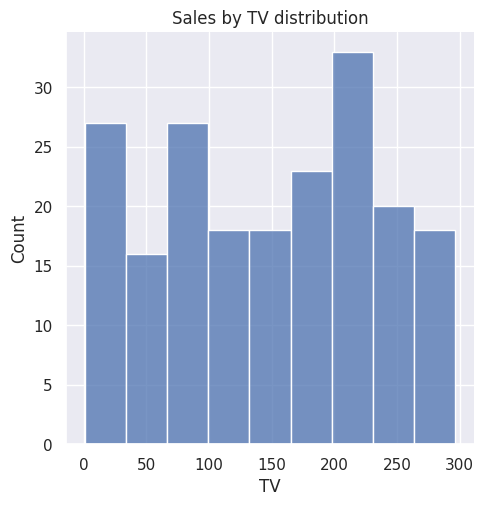

In [11]:
sns.set()
plt.figure(figsize = (6,6))
sns.displot(sales_data['TV'])
plt.title("Sales by TV distribution")
plt.show()

Thus, majority of companies are spending a moderate amount on TV advertising

<Figure size 600x600 with 0 Axes>

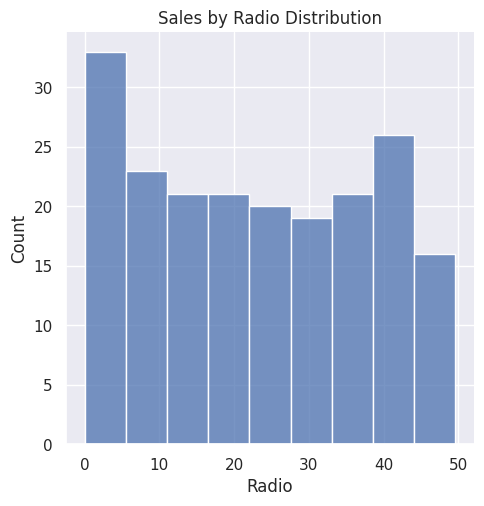

In [12]:
plt.figure(figsize = (6,6))
sns.displot(sales_data['Radio'])
plt.title("Sales by Radio Distribution")
plt.show()

Thus, majority of companies are spending a moderate amount on radio advertising as well.

<Figure size 600x600 with 0 Axes>

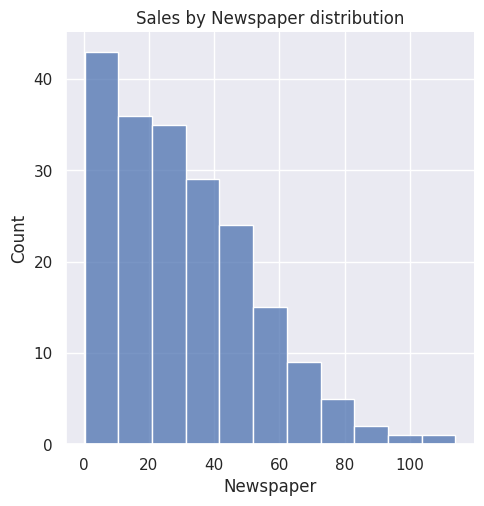

In [13]:
plt.figure(figsize = (6,6))
sns.displot(sales_data['Newspaper'])
plt.title("Sales by Newspaper distribution")
plt.show()

Thus, most companies are spending a small amount on newspaper advertising.

In [14]:
# Separating features and target
X = sales_data.drop(columns = ['Sales', 'Unnamed: 0'], axis = 1)
Y = sales_data['Sales']

In [15]:
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [16]:
print(Y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [17]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

In [18]:
model = StandardScaler()

In [19]:
standardized_data = model.fit_transform(X)

In [20]:
print(standardized_data)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

In [21]:
X = standardized_data
print(X)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

In [22]:
# Performing train test split on our dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(200, 3) (160, 3) (40, 3)


In [24]:
# We will prefer to train our model with XGBoost Regressor
regressor = XGBRegressor()

In [25]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [27]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared training value:", r2_train)

R squared training value: 0.9999999295553631


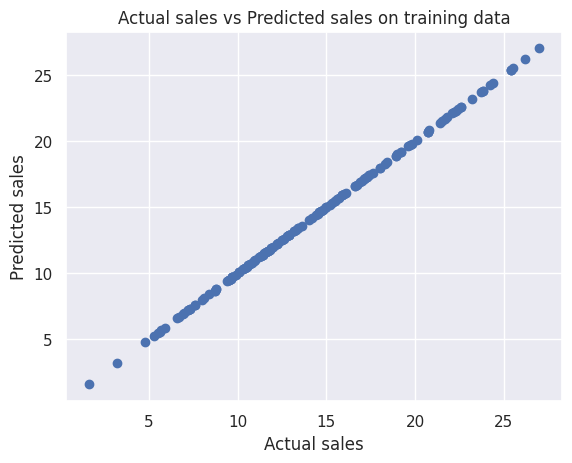

In [33]:
# Visualization using scatterplot
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Actual sales vs Predicted sales on training data")
plt.show()

In [29]:
# Prediction on testing data
testing_data_prediction = regressor.predict(X_test)

In [30]:
r2_test = metrics.r2_score(Y_test, testing_data_prediction)

In [31]:
print("R squared testing value:", r2_test)

R squared testing value: 0.9549568356105793


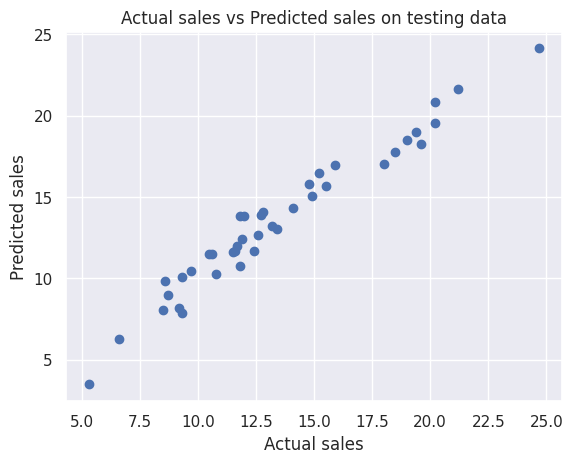

In [34]:
# Visualization using scatterplot
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual sales")
plt.ylabel("Predicted sales")
plt.title("Actual sales vs Predicted sales on testing data")
plt.show()

Thus, our model will hopefully work fairly well.

In [36]:
# Building a predictive system.
input_data = (156.8, 8.9,	4.4)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)

print("The estimated sales value is:", prediction)

The estimated sales value is: [26.857817]
